<a href="https://colab.research.google.com/github/Minh-A/Dacon/blob/main/Dacon_LSTM_Beta6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 여기서 확인

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Conv3D, ConvLSTM2D, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

# 파이토치 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader, TensorDataset
from torch.autograd import Variable  # 자동미분기능 제공
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm  # 진행표시바

# np.random.seed(777)
# torch.manual_seed(777)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # GPU, CPU 선택
print('CPU? GPU? : ', device)

CPU? GPU? :  cuda:0


> pytorch tpu
* https://beomi.github.io/2020/02/24/Pytorch-with-TPU-on-Colab/

* https://colab.research.google.com/github/pytorch/xla/blob/master/contrib/colab/single-core-alexnet-fashion-mnist.ipynb#scrollTo=tdIxkkiACX92

In [ ]:
!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.8-cp37-cp37m-linux_x86_64.whl

     |████████████████████████████████| 144.6MB 79kB/s 
     |████████████████████████████████| 61kB 3.1MB/s 
  Found existing installation: google-api-python-client 1.7.12
    Uninstalling google-api-python-client-1.7.12:
      Successfully uninstalled google-api-python-client-1.7.12


In [ ]:
# VERSION = "20200325"  #@param ["1.5" , "20200325", "nightly"]
# !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
# !python pytorch-xla-env-setup.py --version $VERSION

In [ ]:
import torch_xla
# import torch_xla.core.xla_model as xm

# Creates AlexNet for 10 classes
# net = torchvision.models.alexnet(num_classes=10)

# Acquires the default Cloud TPU core and moves the model to it
device = xm.xla_device()
print(device)


ImportError: ignored

----

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  
    # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 
    # default distribution strategy in Tensorflow. Works on CPU and single GPU.
print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.81.193.18:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.81.193.18:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.81.193.18:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [ ]:
with strategy.scope():
    inputs=Input((None, x_train_.shape[2], x_train_.shape[3], 1))

    convLSTM = ConvLSTM2D(filters=64, kernel_size=3, padding='same', return_sequences=True)(inputs)
    convLSTM = BatchNormalization()(convLSTM)

    convLSTM = ConvLSTM2D(filters=64, kernel_size=3, padding='same', return_sequences=True)(convLSTM)
    convLSTM = BatchNormalization()(convLSTM)

    convLSTM = ConvLSTM2D(filters=64, kernel_size=3, padding='same', return_sequences=True)(convLSTM)
    convLSTM = BatchNormalization()(convLSTM)

    outputs = Conv3D(filters=1, kernel_size=3, activation='relu', padding='same', data_format='channels_last')(convLSTM)

    model = Model(inputs, outputs)
    model.compile(loss='mae', optimizer=Adam())
    
model.summary()

NameError: ignored

데이터

In [ ]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train.csv')
fn.tail()

,month,file_nm
477,2018-08,201808.npy
478,2018-09,201809.npy
479,2018-10,201810.npy
480,2018-11,201811.npy
481,2018-12,201812.npy


In [ ]:
# 이거는 데이터명만
# 첫 번째 파일은 제하고
dm = fn.iloc[423:,1]
dm.shape

(59,)

In [ ]:
# 데이터 생성
data = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/201401.npy')
data = data.reshape(1,448,304,5)

for i in tqdm(dm):
    a = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/'+i)
    a = a.reshape(1,448,304,5)

    data = np.concatenate((data,a), axis=0)
data = np.array(data)
data = data[:,:,:,0]

data.shape


100%|██████████| 59/59 [00:00<00:00, 116.98it/s]


(60, 448, 304)

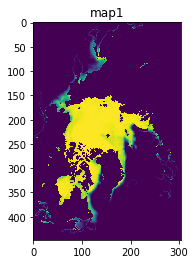

In [ ]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(data[0], interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

> pytorch 
* https://teddylee777.github.io/pytorch/conv2d-output-size-%EA%B3%84%EC%82%B0%EB%B2%95

In [ ]:
data.shape

(60, 448, 304)

In [ ]:
# 데이터 셋 만들기

# 데이터 셋 형태 변환
data = data.reshape(60,1,448,304)

# 월별로 데이터 셋 생성
for i in tqdm(range(12)):
  globals()['train{}'.format(i)] = np.array(np.concatenate((data[0+i], data[12+i], data[24+i], data[36+i], data[48+i]), axis=0)).reshape(5,448,304,1)

  print("\n",globals()['train{}'.format(i)].shape)  # globals()는 그 변수를 의미 - 없으면 그냥 문자열

100%|██████████| 12/12 [00:00<00:00, 804.46it/s]


 (5, 448, 304, 1)

 (5, 448, 304, 1)

 (5, 448, 304, 1)

 (5, 448, 304, 1)

 (5, 448, 304, 1)

 (5, 448, 304, 1)

 (5, 448, 304, 1)

 (5, 448, 304, 1)

 (5, 448, 304, 1)

 (5, 448, 304, 1)

 (5, 448, 304, 1)

 (5, 448, 304, 1)


* 첫번째 parameter 인 3은 input_channel_size가 되겠습니다. 여기서 input_channel_size는 Input Image의 RGB depth 인 3이 되겠습니다. (즉, 32*32 Image 3장이 들어간다고 보면 되겠습니다.)

* 두번째 parameter 인 32는 output_volume_size입니다. 즉, conv1 layer를 거쳐 몇장의 필터를 만들어 내고 싶은가? 입니다. 32장의 필터를 만들어 내고 싶으므로, 32가 되겠습니다.

* 세번째 parameter는 kernel_size입니다. Filter_size라고도 불리기도 하는데, 말 그대로 filter의 사이즈를 정의하는 것입니다. 3*3 filter를 사용하고 싶기 때문에 3을 기입했습니다.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 1, padding=0)
        self.conv2 = nn.Conv2d(3, 1, 1, padding=0)

        # self.fc1 = nn.LSTM(3, 3)

        # self.conv3 = nn.Conv2d(3, 3, 1, padding=0)
        # self.conv4 = nn.Conv2d(3, 1, 1, padding=0)

        # self.fc1 = nn.Linear(304, 304)

        # self.conv4 = nn.Conv2d(1,1,1, padding=0)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x)[-1:,:,:])
        # x = self.fc1(x)
        # x = F.relu(self.conv3(x))
        # x = F.relu(self.conv4(x[-1:,:,:]))

        # x = self.fc1(x[-1:,:,:])
        # x = F.relu(self.fc2(x[-1:,:,:]))

        # x = F.relu(self.conv4(x[-1:,:,:]))
        
        return x.view(1,448,304)

model_cnn = Net().to(device)  # to(device)를 통해 GPU로

In [ ]:
model_cnn = Net().to(device)  # to(device)를 통해 GPU로
model_cnn

Net(
  (conv1): Conv2d(1, 3, kernel_size=(1, 1), stride=(1, 1))
  (conv2): Conv2d(3, 1, kernel_size=(1, 1), stride=(1, 1))
  (fc1): LSTM(1, 1)
)

In [ ]:
# 데이터 셋
window_x = torch.tensor(train0[:4]).float().to(device)  # 데이터를 GPU로
window_y = torch.tensor(train0[4]).float().to(device)

In [ ]:
window_x.shape

torch.Size([4, 1, 448, 304])

In [ ]:
model_cnn(window_x).shape

torch.Size([1, 448, 304])

In [ ]:
window_y.shape

torch.Size([1, 448, 304])

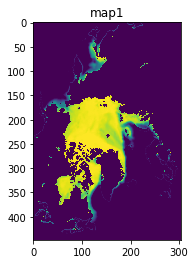

In [ ]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(model_cnn(window_x)[0].cpu().detach(), interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

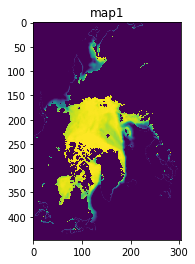

In [ ]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(window_x[3][0].cpu().detach(), interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

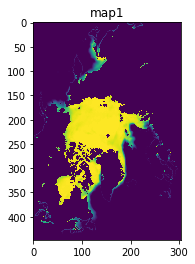

In [ ]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(window_y[0].cpu().detach(), interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

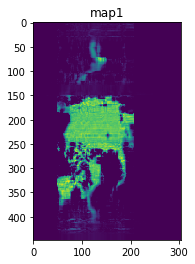

In [ ]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(model_cnn(window_x)[0].cpu().detach(), interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

In [ ]:
# 가장 완벽한 러닝 레이트를 찾아
from random import *
a = [0.005, 0.001, 0.0005]
hsize1 = [350]

for j in range(len(a)):
  model_cnn = Net().to(device)  # to(device)를 통해 GPU로
  lr = a[j]
  for i in range(len(hsize1)):
    hsi = hsize1[i]

    print("\n",a[j])
    print("히든1 노드: %s" % hsi)
  
    optimizer = torch.optim.Adam(model_cnn.parameters(), lr = lr)  
    criterion = nn.MSELoss()
    num_epochs  = 3000
    train_error = []

    for t in range(num_epochs):
      train_pred = model_cnn(window_x)
      loss = criterion(train_pred, window_y)
      train_error.append(loss)
    
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if (t +1) % 500 == 0:
        print((t +1), "Epochs train MSE: ", loss.item())


 0.005
히든1 노드: 350
500 Epochs train MSE:  7935.76513671875
1000 Epochs train MSE:  7935.76513671875
1500 Epochs train MSE:  7935.76513671875
2000 Epochs train MSE:  7935.76513671875
2500 Epochs train MSE:  7935.76513671875
3000 Epochs train MSE:  7935.76513671875

 0.001
히든1 노드: 350
500 Epochs train MSE:  811.8372802734375


KeyboardInterrupt: ignored

In [ ]:
a = []

a.append(train0[:2])
a.append(train1[:2])

a = np.array(a)

a.shape

(2, 2, 448, 304, 1)

In [ ]:
b = []

b.append(train0[3:])
b.append(train1[3:])

b = np.array(b)
b.reshape(2,2,448,304,1)

b.shape

(2, 2, 448, 304, 1)

In [ ]:
train0[:4].shape

(4, 448, 304, 1)

> Keras
* https://deep-deep-deep.tistory.com/32
* https://www.kaggle.com/kcostya/convlstm-convolutional-lstm-network-tutorial

> 데이터 셋
* (batch_size, time_steps, height, width, filters (layers)

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers 
import numpy as np 
import pylab as plt

seq = keras.Sequential(
    [
     keras.Input( shape=(None, 448, 304, 1)),      # (time, rows, cols, channels) 
                                               # 이 중, time을 지정하지 가변으로 두고, (None, 40,40,1) shape의 프레임을 입력받습니다. 
                                             # 40x40에 1채널을 가지는 프레임입니다.
     layers.ConvLSTM2D( filters=40, kernel_size=(1, 1), padding="same", return_sequences=True ),
     layers.BatchNormalization(), 
     layers.ConvLSTM2D( filters=40, kernel_size=(1, 1), padding="same", return_sequences=True ),
     layers.BatchNormalization(), 
     layers.ConvLSTM2D( filters=40, kernel_size=(1, 1), padding="same", return_sequences=True ),
     layers.BatchNormalization(), 
     layers.Conv3D( filters=1, kernel_size=(1, 1, 1), activation="sigmoid", padding="same" ),
    ]
     )

seq.compile(loss="binary_crossentropy", optimizer="adadelta")

In [ ]:
seq

In [ ]:
epochs = 10 # 예제이기 때문에 에폭을 1로 지정했습니다. # 실제로 모델의 정확도를 높이려면 수백번 이상으로 설정하세요!  

seq.fit( a,  b, batch_size=10, epochs=epochs, verbose=2, validation_split=0.1)


Epoch 1/10
1/1 - 7s - loss: -1.1227e+02 - val_loss: -6.7759e-01
Epoch 2/10
1/1 - 0s - loss: -1.1236e+02 - val_loss: -7.0805e-01
Epoch 3/10
1/1 - 0s - loss: -1.1246e+02 - val_loss: -7.3878e-01
Epoch 4/10
1/1 - 0s - loss: -1.1255e+02 - val_loss: -7.6977e-01
Epoch 5/10
1/1 - 0s - loss: -1.1265e+02 - val_loss: -8.0103e-01
Epoch 6/10
1/1 - 0s - loss: -1.1275e+02 - val_loss: -8.3256e-01
Epoch 7/10
1/1 - 0s - loss: -1.1284e+02 - val_loss: -8.6436e-01
Epoch 8/10
1/1 - 0s - loss: -1.1294e+02 - val_loss: -8.9645e-01
Epoch 9/10
1/1 - 0s - loss: -1.1304e+02 - val_loss: -9.2881e-01
Epoch 10/10
1/1 - 0s - loss: -1.1313e+02 - val_loss: -9.6146e-01


In [ ]:
seq.predict(a).shape

(2, 2, 448, 304, 1)

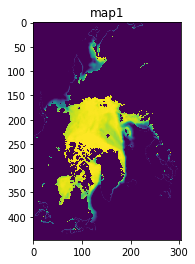

In [ ]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(b[0][0][:,:,0], interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

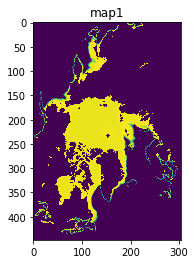

In [ ]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(seq.predict(b)[0][0][:,:,0], interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

In [ ]:
model.fit(a, epochs=20)

Epoch 1/20


ValueError: ignored

In [ ]:
window_x[0][0].shape

torch.Size([448, 304])

In [ ]:
# 모형 학습

# 최적화 담당
optimizer = optim.Adam(model_cnn.parameters(), lr = 0.0001)  # Adam 경사하강법을 사용
# Learning Rate는 큰 사이즈일 경우 매우 작게 조정?!

criterion = nn.MSELoss()

for epoch in range(2000):
  total_loss = 0
  optimizer.zero_grad()  # 경사초기화
  output = model_cnn(train_x)  # 순전파 계산
  loss = criterion(output, train_y)  # 오차 계산

  
  loss.backward()  # 역전파 계산
  optimizer.step()  #가중치 업데이트

  total_loss += loss.data  # 누적오차 계산
  
  # 50회 반복마다 누적 오차 계산
  if (epoch+1) % 100 == 0:
    print(epoch+1, float(total_loss))

# 오케이 다시 해보겠음
> 회귀를 사요요용
* https://dacon.io/competitions/official/235706/codeshare/2434?dtype=recent

In [1]:
# 파이토치 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader, TensorDataset
from torch.autograd import Variable  # 자동미분기능 제공
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm  # 진행표시바

# np.random.seed(777)
# torch.manual_seed(777)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # GPU, CPU 선택
print('CPU? GPU? : ', device)

CPU? GPU? :  cuda:0


In [2]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train.csv')
fn.tail()

,month,file_nm
477,2018-08,201808.npy
478,2018-09,201809.npy
479,2018-10,201810.npy
480,2018-11,201811.npy
481,2018-12,201812.npy


In [4]:
# 이거는 데이터명만
# 첫 번째 파일은 제하고
dm = fn.iloc[423:,1]
dm.shape

(59,)

> 데이터는 torch.Size([12, 1, 6, 448, 304]) 이 형태
* [batch_size, channel(Filter layer), frames, height, width]

In [5]:
# 데이터 생성
data = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/201401.npy')
data = data.reshape(1,448,304,5)

for i in tqdm(dm):
    a = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/'+i)
    a = a.reshape(1,448,304,5)

    data = np.concatenate((data,a), axis=0)
data = np.array(data)
data = data[:,:,:,0]

data.shape

100%|██████████| 59/59 [00:01<00:00, 51.95it/s]


(60, 448, 304)

In [6]:
# 데이터 셋 만들기

# 데이터 셋 형태 변환
data = data.reshape(60,1, 448,304)

# 월별로 데이터 셋 생성
for i in tqdm(range(12)):
  globals()['train{}'.format(i)] = np.array(np.concatenate((data[0+i], data[12+i], data[24+i], data[36+i], data[48+i]), axis=0))

  print("\n",globals()['train{}'.format(i)].shape)  # globals()는 그 변수를 의미 - 없으면 그냥 문자열

100%|██████████| 12/12 [00:00<00:00, 454.47it/s]


 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)


In [122]:
# 이거 잠시만 
vec = train0

In [7]:
# 데이터 회귀 사용
# 함수 사용

for i in range(12):
  vec = globals()['train{}'.format(i)]
  a = vec.reshape(5,136192)
  lda = pd.DataFrame(a.T)
  
  # 훈련, 테스트 데이터 생성
  x_tr = lda[[0,1,2]]
  y_tr = lda[[3]]
  x_test = lda[[1,2,3]]

  # 모델
  from sklearn.linear_model import LinearRegression

  mod = LinearRegression()
  mod.fit(x_tr, y_tr) 

  p1 = mod.predict(x_test)
  pred = p1.T.reshape(1,448,304)  #예측

  globals()['pred_{}'.format(i)] = pred


In [8]:
for i in range(12):
  print(globals()['pred_{}'.format(i)].shape)

(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)


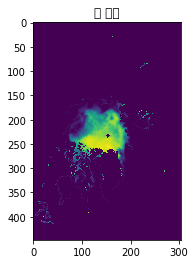

In [9]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(pred_7[0], interpolation = 'None')
matplotlib.pyplot.title('웅 예측')
matplotlib.pyplot.show()

In [11]:
# 제출 형태로 변환

# 데이터 생성
sh1 = pd.DataFrame(pred_0.reshape(1,-1))

for i in range(11):
  globals()['pred_{}'.format(i+1)] = globals()['pred_{}'.format(i+1)].reshape(1,-1)

  sh = globals()['pred_{}'.format(i+1)]
  sh = pd.DataFrame(sh)

  sh1 = pd.concat((sh1, sh), axis=0)
  print(sh1.shape)

(2, 136192)
(3, 136192)
(4, 136192)
(5, 136192)
(6, 136192)
(7, 136192)
(8, 136192)
(9, 136192)
(10, 136192)
(11, 136192)
(12, 136192)


In [17]:
# sh1의 인덱스 수정

# 12개월, 24개월 투투
result = pd.concat([sh1,sh1], axis=0)
result = result.reset_index(drop=True)

# 파일 제출
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/sample_submission.csv")
sub = pd.concat([submission.loc[:,'month'],result], axis=1)
sub.columns = submission.columns.values  # 제출파일에서 컬럼명을 
sub.tail()

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
19,2020-08,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,...,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094
20,2020-09,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,...,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689
21,2020-10,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,...,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156
22,2020-11,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,...,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551
23,2020-12,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,...,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.34

In [18]:
# 제출
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub_0310.csv', index = False)

> 활성화 함수(ReLU)를 통과
* https://3months.tistory.com/64

In [19]:
# ReLU함수
def relu(x) : 
    return np.maximum(0, x)

In [26]:
sub1 = relu(sub.iloc[:,1:])
sub1.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,...,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689
21,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,...,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156
22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [29]:
# 파일 제출
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/sample_submission.csv")
sub = pd.concat([submission.loc[:,'month'],sub1], axis=1)
sub.columns = submission.columns.values  # 제출파일에서 컬럼명을 
sub.tail()

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
19,2020-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20,2020-09,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,...,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689
21,2020-10,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,...,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156
22,2020-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23,2020-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [30]:
# 제출
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub_0310_1.csv', index = False)

# 회귀2
> 나중에 시그모이드 함수를 통과하도록
* 음수는 없고 양수만 존재하게

In [ ]:
# 파이토치 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader, TensorDataset
from torch.autograd import Variable  # 자동미분기능 제공
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm  # 진행표시바

# np.random.seed(777)
# torch.manual_seed(777)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # GPU, CPU 선택
print('CPU? GPU? : ', device)

CPU? GPU? :  cuda:0


In [ ]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train.csv')
fn.tail()

,month,file_nm
477,2018-08,201808.npy
478,2018-09,201809.npy
479,2018-10,201810.npy
480,2018-11,201811.npy
481,2018-12,201812.npy


In [ ]:
# 이거는 데이터명만
# 첫 번째 파일은 제하고
dm = fn.iloc[423:,1]
dm.shape

(59,)

In [ ]:
# 데이터 생성
data = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/201401.npy')
data = data.reshape(1,448,304,5)

for i in tqdm(dm):
    a = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/'+i)
    a = a.reshape(1,448,304,5)

    data = np.concatenate((data,a), axis=0)
data = np.array(data)
data = data[:,:,:,0]

data.shape

100%|██████████| 59/59 [00:01<00:00, 51.95it/s]


(60, 448, 304)

In [ ]:
# 데이터 셋 만들기

# 데이터 셋 형태 변환
data = data.reshape(60,1, 448,304)

# 월별로 데이터 셋 생성
for i in tqdm(range(12)):
  globals()['train{}'.format(i)] = np.array(np.concatenate((data[0+i], data[12+i], data[24+i], data[36+i], data[48+i]), axis=0))

  print("\n",globals()['train{}'.format(i)].shape)  # globals()는 그 변수를 의미 - 없으면 그냥 문자열

100%|██████████| 12/12 [00:00<00:00, 454.47it/s]


 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)

 (5, 448, 304)


In [ ]:
# 데이터 회귀 사용
# 함수 사용

for i in range(12):
  vec = globals()['train{}'.format(i)]
  a = vec.reshape(5,136192)
  lda = pd.DataFrame(a.T)
  
  # 훈련, 테스트 데이터 생성
  x_tr = lda[[0,1,2]]
  y_tr = lda[[3]]
  x_test = lda[[1,2,3]]

  # 모델
  from sklearn.linear_model import LinearRegression

  mod = LinearRegression()
  mod.fit(x_tr, y_tr) 

  p1 = mod.predict(x_test)
  pred = p1.T.reshape(1,448,304)  #예측

  globals()['pred_{}'.format(i)] = pred


In [ ]:
for i in range(12):
  print(globals()['pred_{}'.format(i)].shape)

(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)
(1, 448, 304)


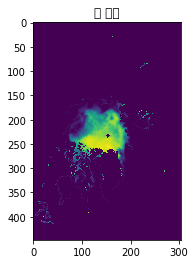

In [ ]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(pred_7[0], interpolation = 'None')
matplotlib.pyplot.title('웅 예측')
matplotlib.pyplot.show()

In [ ]:
# 제출 형태로 변환

# 데이터 생성
sh1 = pd.DataFrame(pred_0.reshape(1,-1))

for i in range(11):
  globals()['pred_{}'.format(i+1)] = globals()['pred_{}'.format(i+1)].reshape(1,-1)

  sh = globals()['pred_{}'.format(i+1)]
  sh = pd.DataFrame(sh)

  sh1 = pd.concat((sh1, sh), axis=0)
  print(sh1.shape)

(2, 136192)
(3, 136192)
(4, 136192)
(5, 136192)
(6, 136192)
(7, 136192)
(8, 136192)
(9, 136192)
(10, 136192)
(11, 136192)
(12, 136192)


In [ ]:
# sh1의 인덱스 수정

# 12개월, 24개월 투투
result = pd.concat([sh1,sh1], axis=0)
result = result.reset_index(drop=True)

# 파일 제출
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/sample_submission.csv")
sub = pd.concat([submission.loc[:,'month'],result], axis=1)
sub.columns = submission.columns.values  # 제출파일에서 컬럼명을 
sub.tail()

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
19,2020-08,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,...,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094,-0.044094
20,2020-09,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,...,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689
21,2020-10,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,...,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156
22,2020-11,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,...,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551,-0.058551
23,2020-12,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,...,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.341045,-0.34

In [ ]:
# 제출
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub_0310.csv', index = False)

> 활성화 함수(ReLU)를 통과
* https://3months.tistory.com/64

In [ ]:
# ReLU함수
def relu(x) : 
    return np.maximum(0, x)

In [ ]:
sub1 = relu(sub.iloc[:,1:])
sub1.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,...,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689,0.251689
21,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,...,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156,0.393156
22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
# 제출
sub1.to_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub_0310_1.csv', index = False)

In [8]:
# 변동성 정리
for i in range(4):
  globals()['train1_{}'.format(i)] = train1[0+i] - train1[1+i]

In [96]:
vec = []

for i in range(4):
  p = train1[0+i] - train1[1+i]
  vec.append(p)

vec = np.array(vec)

In [123]:
vec.shape

(5, 448, 304)

Data Reshape

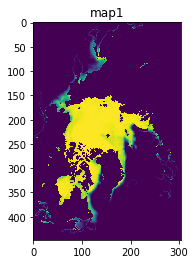

In [124]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(vec[0], interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

In [125]:
vec.shape

(5, 448, 304)

In [126]:
a = vec.reshape(5,136192)
a.shape

(5, 136192)

In [127]:
aa = a.T
aa.shape

(136192, 5)

In [128]:
a.reshape(5,448,304)[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

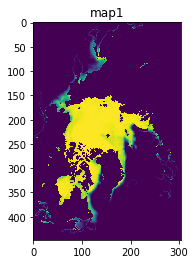

In [129]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(a.reshape(5,448,304)[0], interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

In [130]:
pd.DataFrame(aa)

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
136187,0,0,0,0,0
136188,0,0,0,0,0
136189,0,0,0,0,0
136190,0,0,0,0,0


In [132]:
lda = pd.DataFrame(aa)
lda[[3]], lda[[0,1,2]]

(        3
 0       0
 1       0
 2       0
 3       0
 4       0
 ...    ..
 136187  0
 136188  0
 136189  0
 136190  0
 136191  0
 
 [136192 rows x 1 columns],         0  1  2
 0       0  0  0
 1       0  0  0
 2       0  0  0
 3       0  0  0
 4       0  0  0
 ...    .. .. ..
 136187  0  0  0
 136188  0  0  0
 136189  0  0  0
 136190  0  0  0
 136191  0  0  0
 
 [136192 rows x 3 columns])

In [133]:
# 훈련, 테스트 데이터 생성
x_tr = lda[[0,1,2]]
y_tr = lda[[3]]
x_test = lda[[1,2,3]]

In [134]:
from sklearn.linear_model import LinearRegression

mod = LinearRegression()
mod.fit(x_tr, y_tr) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
mod.predict(x_test).shape

(136192, 1)

In [136]:
p1 = mod.predict(x_test)
p1.T.reshape(1,448,304)

array([[[-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
         -0.10631017, -0.10631017],
        [-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
         -0.10631017, -0.10631017],
        [-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
         -0.10631017, -0.10631017],
        ...,
        [-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
         -0.10631017, -0.10631017],
        [-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
         -0.10631017, -0.10631017],
        [-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
         -0.10631017, -0.10631017]]])

In [137]:
print(mod.coef_)

[[-0.00144726  0.21644527  0.74596168]]


In [138]:
np.array(y_tr).reshape(448,304)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

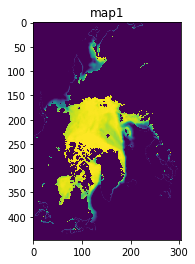

In [155]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(np.array(y_tr).reshape(448,304), interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

In [140]:

p1.T.reshape(448,304).shape

(448, 304)

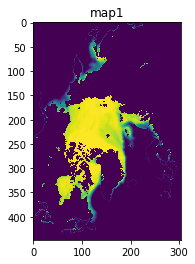

In [156]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(p1.T.reshape(448,304), interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

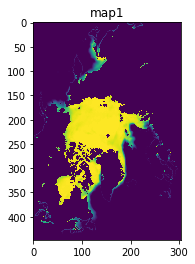

In [164]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(np.array(lda[[4]]).reshape(448,304), interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

In [150]:
p1.T.reshape(448,304)

array([[-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
        -0.10631017, -0.10631017],
       [-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
        -0.10631017, -0.10631017],
       [-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
        -0.10631017, -0.10631017],
       ...,
       [-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
        -0.10631017, -0.10631017],
       [-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
        -0.10631017, -0.10631017],
       [-0.10631017, -0.10631017, -0.10631017, ..., -0.10631017,
        -0.10631017, -0.10631017]])

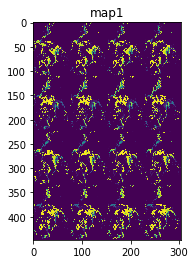

In [53]:
# 그래프 그려보기
import matplotlib.pyplot
matplotlib.pyplot.imshow(mod.predict(x_test).reshape(448, 304), interpolation = 'None')
matplotlib.pyplot.title('map1')
matplotlib.pyplot.show()

In [ ]:
# Creating Model

class CustomNet(nn.Module):
    def __init__(self, params):
        super(CustomNet, self).__init__()
        input_frames, input_channel, input_height, input_width = params["shape"] # input_frames? input_batch?
        init_filters = params["init_filters"]
        self.dropout_rate = params["dropout_rate"]
        self.conv1 = nn.Conv3d(input_channel, init_filters, kernel_size=3, padding=1)
        self.conv2 = nn.Conv3d(init_filters, init_filters*2, kernel_size=3, padding=1)
        self.conv3 = nn.ConvTranspose3d(init_filters*2, 1, kernel_size=3, padding=1)

    def forward(self, x):
        input = x
        x = F.relu(self.conv1(x))
        x = F.max_pool3d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.upsample(x, size=(2, 448, 304))
        print("input: ", input.shape)
        print("output: ", x.shape)
        return x

In [ ]:
my_model = CustomNet(MODEL_PARAMS).to(device) # to(device) 해줘야 에러가 안남
print(my_model)
summary(my_model, input_size=(1, 6, 448, 304), device=device.type) # summary 함수를 통해 임의의 사이즈를 넣어 구조와 파라미터를 확인할 수 있습니다